In [4]:
library(readxl)
library(writexl)
library(recommenderlab)  # collaborative filtering (CF)
library(tidyverse)

Warning message:
"package 'recommenderlab' was built under R version 4.0.3"
Loading required package: Matrix

Loading required package: arules

Warning message:
"package 'arules' was built under R version 4.0.3"

Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write


Loading required package: proxy

Warning message:
"package 'proxy' was built under R version 4.0.3"

Attaching package: 'proxy'


The following object is masked from 'package:Matrix':

    as.matrix


The following objects are masked from 'package:stats':

    as.dist, dist


The following object is masked from 'package:base':

    as.matrix


Loading required package: registry

Warning message:
"package 'registry' was built under R version 4.0.3"
Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplo

In [2]:
#install.packages("recommenderlab")

Installing package into 'C:/Users/woosh/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependencies 'RcppProgress', 'arules', 'proxy', 'registry', 'irlba', 'recosystem'




package 'RcppProgress' successfully unpacked and MD5 sums checked
package 'arules' successfully unpacked and MD5 sums checked
package 'proxy' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'irlba' successfully unpacked and MD5 sums checked
package 'recosystem' successfully unpacked and MD5 sums checked
package 'recommenderlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\woosh\AppData\Local\Temp\RtmpuoOAVJ\downloaded_packages


In [75]:
# import data
#d <- read_csv("netflix.csv")        # 24,482,640 obs
d <- read_xlsx("Data/netflix_1m.xlsx")   # sample 1m obs
#d <- read_xlsx("Data/netflix_30.xlsx")   # sample 30 obs

In [76]:
# description
d %>% summarize(
  n_users    = n_distinct(userId),
  n_movies   = n_distinct(movieId),
  min_rating = min(rating),  
  max_rating = max(rating) )

n_users,n_movies,min_rating,max_rating
<int>,<int>,<dbl>,<dbl>
2700,1083,0.5,5


In [77]:
d %>% group_by(userId) %>% 
  summarise(count=n()) %>%
  arrange(-count)

`summarise()` ungrouping output (override with `.groups` argument)



userId,count
<dbl>,<int>
5829,928
48329,879
59449,878
8659,873
45139,832
45811,822
40207,821
70648,808
65469,791


In [78]:
# long to wide format
spread(d, userId, rating)
spread(d, title, rating)

movieId,title,24,46,49,62,120,132,150,229,...,70341,70375,70405,70450,70511,70560,70577,70639,70648,70667
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Toy Story (1995),4,4.5,5.0,3.0,NA,3,4,NA,...,1.5,5.0,0.5,4,NA,4.0,5.0,4.0,4.0,NA
2,Jumanji (1995),NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,2,NA,NA,NA,NA,NA
3,Grumpier Old Men (1995),NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,2.5,NA
5,Father of the Bride Part II (1995),NA,NA,NA,NA,NA,NA,NA,1,...,NA,NA,NA,NA,NA,3.0,NA,NA,2.0,NA
6,Heat (1995),NA,3.0,NA,NA,NA,NA,NA,NA,...,NA,4.5,NA,4,NA,NA,NA,4.5,3.0,NA
7,Sabrina (1995),NA,NA,NA,NA,NA,NA,NA,2,...,NA,NA,NA,NA,NA,3.5,NA,NA,3.0,NA
10,GoldenEye (1995),NA,NA,5.0,4.0,NA,NA,NA,NA,...,1.5,NA,NA,4,NA,3.5,4.0,4.0,3.5,NA
11,"American President, The (1995)",NA,NA,NA,NA,NA,3,3,NA,...,NA,4.0,NA,NA,NA,3.5,4.0,NA,3.5,NA
16,Casino (1995),3,NA,NA,NA,NA,NA,5,NA,...,NA,5.0,NA,NA,NA,NA,NA,NA,3.0,NA


ERROR: Error: cannot allocate vector of size 4.0 Gb


In [79]:
# Collaborative filtering ---------------------------------------

# make RealRatingMatrix
ratings <- d %>% 
  select(title, userId, rating) %>% 
  spread(title, rating) %>% 
  column_to_rownames(var="userId") %>% 
  as.matrix 
ratings <- ratings %>% as("realRatingMatrix")

In [80]:

# recommender
Rec.user <- Recommender(ratings, "UBCF", param=list(method="Pearson"))

In [81]:
# predict ratings for user 638 (position 3)
pred <- predict(Rec.user, ratings[3,], type=c("ratings"))
as(pred,"list")


$`49`
                                                               (500) Days of Summer (2009) 
                                                                                  5.425049 
                                                                     ¡Three Amigos! (1986) 
                                                                                  3.740991 
                                                         10 Things I Hate About You (1999) 
                                                                                  3.961028 
                                                                     101 Dalmatians (1996) 
                                                                                  3.526170 
                                    101 Dalmatians (One Hundred and One Dalmatians) (1961) 
                                                                                  4.209913 
                                                                  13th Warrior, The (1999) 
                                                                                  3.556375 
                                                       20,000 Leagues Under the Sea (1954) 
                                                                                  4.433847 
                                                              2001: A Space Odyssey (1968) 
                                                                                  4.479619 
                                                                           21 Grams (2003) 
                                                                                  4.217586 
                                                                      28 Days Later (2002) 
                                                                                  4.708562 
                                                                       3:10 to Yuma (2007) 
                                                                                  5.053509 
                                                                                300 (2007) 
                                                                                  4.257048 
                                                            40-Year-Old Virgin, The (2005) 
                                                                                  4.206119 
                                                                     50 First Dates (2004) 
                                                                                  3.683409 
                                                                             8 Mile (2002) 
                                                                                  3.936937 
                                                       A.I. Artificial Intelligence (2001) 
                                                                                  3.689920 
                                                                        About a Boy (2002) 
                                                                                  3.925027 
                                                                      About Schmidt (2002) 
                                                                                  3.743185 
                                                                         Abyss, The (1989) 
                                                                                  4.564837 
                                                     Ace Ventura: When Nature Calls (1995) 
                                                                                  3.393772 
                                                                         Adaptation (2002) 
                                                                                  4.878250 
                                                               Addams Family Values (1993) 
                                      

In [82]:
# Movie, User and Movie-User bias (OPTIONAL) ---------------------

# add RMSE function
RMSE <- function(predicted_ratings, true_ratings){
  sqrt(mean((predicted_ratings - true_ratings)^2))
}

In [83]:
# naive
mu <- mean(d$rating)
naive_rmse <- RMSE(mu,d$rating)
print(naive_rmse)

[1] 0.9902097


In [84]:
# movie b_i
movie_means <- d %>% 
  group_by(movieId) %>% 
  summarize(b_i = mean(rating - mu))

`summarise()` ungrouping output (override with `.groups` argument)



In [85]:

joined <- d %>% 
  left_join(movie_means, by='movieId') %>% 
  replace_na(list(b_i=0))

In [86]:
predicted_ratings <- mu + joined$b_i
print(RMSE(predicted_ratings, d$rating))

[1] 0.8933191


In [87]:
# user b_u
user_means <- joined %>% 
  group_by(userId) %>% 
  summarize(b_u = mean(rating - mu - b_i))

joined <- joined %>% 
  left_join(user_means, by='userId') %>% 
  replace_na(list(b_i=0, b_u=0))

predicted_ratings <- mu + joined$b_i + joined$b_u
print(RMSE(predicted_ratings, d$rating))

`summarise()` ungrouping output (override with `.groups` argument)



[1] 0.8022685


In [88]:
# movie-user b_ui
joined <- joined %>% 
  mutate(resids = rating - mu - b_i - b_u)

Y <- joined %>% 
  select(userId, movieId, title, resids) %>% 
  spread(userId, resids) %>% 
  mutate(title = gsub("\\s\\([^)]*\\)","",title)) # remove year

In [89]:

movie_ids <- Y$movieId
movie_titles <- Y$title

In [90]:
Y <- select(Y, -movieId, -title) %>% as.matrix
Y[is.na(Y)] <- 0
Y

24,46,49,62,120,132,150,229,231,251,...,70341,70375,70405,70450,70511,70560,70577,70639,70648,70667
0.002055381,0.5336652,0.5263563,-1.22340381,0.00000000,-0.6904754,0.3121213,0.0000000,-1.18226835,-0.2656041,...,-1.2466462,1.03348423,-2.4568886,-0.3408536,0.00000000,0.32734748,0.8513448,0.08054857,0.25114522,0.0000000
0.000000000,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,...,0.0000000,0.00000000,0.0000000,0.0000000,-0.57583252,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000
0.000000000,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,...,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.00000000,-0.26146572,0.0000000
0.000000000,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,-1.0487974,0.00000000,0.0000000,...,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000,0.51107707,0.0000000,0.00000000,-0.56512520,0.0000000
0.000000000,-0.9335179,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,...,0.0000000,0.56630108,0.0000000,-0.3080368,0.00000000,0.00000000,0.0000000,0.61336542,-0.71603793,0.0000000
0.000000000,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,-0.4268336,0.00000000,0.0000000,...,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000,0.63304087,0.0000000,0.00000000,0.05683860,0.0000000
0.000000000,0.0000000,1.0372421,0.28748203,0.00000000,0.0000000,0.0000000,0.0000000,-0.17138251,0.0000000,...,-0.7357604,0.00000000,0.0000000,0.1700322,0.00000000,0.33823333,0.3622307,0.59143441,0.26203106,0.0000000
0.000000000,0.0000000,0.0000000,0.00000000,0.00000000,-0.2587682,-0.2561715,0.0000000,0.00000000,0.0000000,...,0.0000000,0.46519147,0.0000000,0.0000000,0.00000000,0.25905472,0.2830521,0.00000000,0.18285246,0.0000000
-0.949635723,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,1.3604302,0.0000000,-0.13395946,0.7827048,...,0.0000000,1.08179312,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.00000000,-0.70054589,0.0000000
-0.885530467,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,...,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000,0.00000000,0.4637590,0.00000000,0.00000000,0.0000000


In [91]:
pca <- prcomp(Y, center=FALSE, scale=FALSE)

k <- 2

In [92]:
pca$x[,1:k] # skip these two lines with netflix_1m
t(pca$rotation[,1:k])

PC1,PC2
-2.0340925,14.10337717
0.6780387,0.02421722
2.6263494,-0.18196668
3.5205198,2.32349383
-2.9886626,-2.11962997
2.9193791,2.61632127
3.6811655,-0.72427342
2.6510153,3.46896067
-5.1071877,-4.27869302
-1.6660519,5.06838253


,24,46,49,62,120,132,150,229,231,251,...,70341,70375,70405,70450,70511,70560,70577,70639,70648,70667
PC1,-0.011510311,0.015877167,0.01054398,-0.0008044163,-0.032164821,-0.0186658096,-0.004367819,-0.03357486,0.01640440,3.659367e-05,...,0.004797497,-0.02166243,0.005091234,8.588485e-03,-0.02885657,0.02071508,-0.02973938,0.02754976,0.01746194,-0.010980562
PC2,-0.004000882,0.001921086,-0.01113096,-0.0341679762,-0.002933372,-0.0001841443,0.002417227,-0.01318236,-0.02107035,-9.469039e-03,...,-0.012020412,0.01450694,-0.016947515,-4.452305e-05,-0.02583194,0.01834529,0.03593488,-0.03482574,-0.02474290,-0.003575197


In [93]:
# plot PC1 and PC2
library(ggrepel)
theme_set(theme_bw(base_size = 10))
tmp <- tibble(PC1  = pca$x[,1],
              PC2  = pca$x[,2],
              name = movie_titles)

In [94]:
keep <- c(
  arrange(tmp,PC1) %>% slice(1:10) %>% .$name,
  arrange(tmp,desc(PC1)) %>% slice(1:10) %>% .$name,
  arrange(tmp,PC2) %>% slice(1:10) %>% .$name,
  arrange(tmp,desc(PC2)) %>% slice(1:10) %>% .$name)

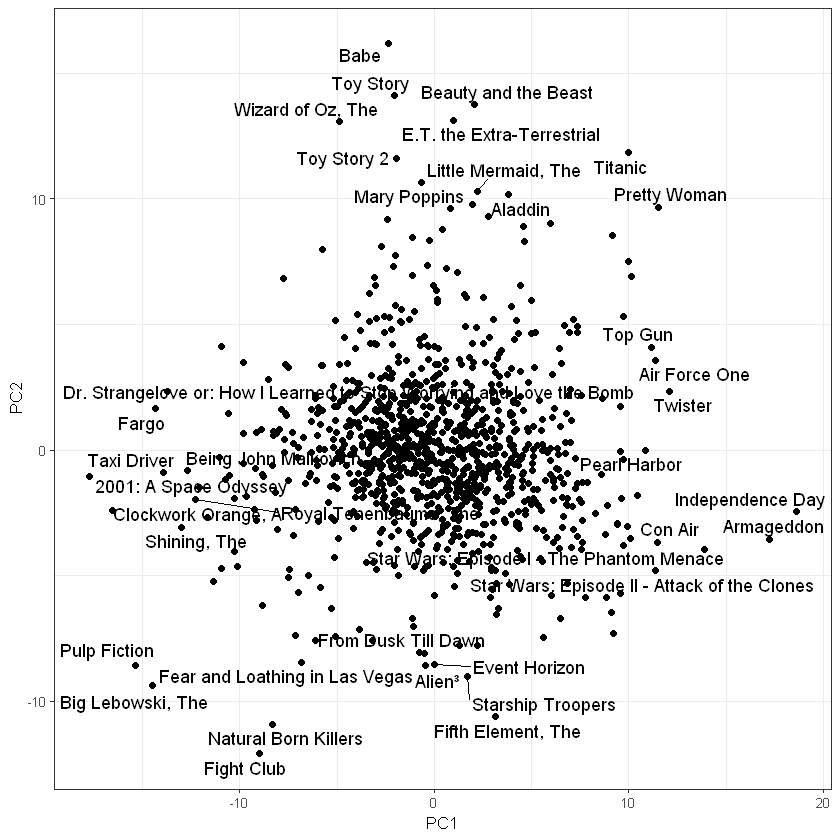

In [95]:
tmp %>%  ggplot(aes(PC1, PC2)) + geom_point() +
  geom_text_repel(aes(PC1, PC2, label=name),
  data = dplyr::filter(tmp, name%in%keep))

In [96]:
# compute b_ui
pred <- pca$x[,1:k] %*% t(pca$rotation[,1:k])
colnames(pred) <- colnames(Y)

In [97]:
interaction <- data.frame(movieId = movie_ids, pred, check.names=FALSE) %>% 
  tbl_df %>% # as a tibble dataframe
  gather(userId, b_ui, -movieId) %>% 
  mutate(userId = as.numeric(userId))

In [98]:
joined <- joined %>% 
  left_join(interaction, by=c('movieId','userId')) %>%
  replace_na(list(b_i=0, b_u=0, b_ui=0))
print(joined,n=35)

# A tibble: 1,000,000 x 8
   userId movieId title                   rating     b_i   b_u   resids     b_ui
    <dbl>   <dbl> <chr>                    <dbl>   <dbl> <dbl>    <dbl>    <dbl>
 1     24       1 Toy Story (1995)             4  0.353  0.146  0.00206 -0.0330 
 2     24      16 Casino (1995)                3  0.305  0.146 -0.950    0.0759 
 3     24      17 Sense and Sensibility ~      3  0.241  0.146 -0.886   -0.00110
 4     24      21 Get Shorty (1995)            4 -0.0152 0.146  0.371    0.0212 
 5     24      25 Leaving Las Vegas (199~      3  0.180  0.146 -0.824    0.0821 
 6     24      32 Twelve Monkeys (a.k.a.~      4  0.458  0.146 -0.103    0.126  
 7     24      34 Babe (1995)                  3 -0.113  0.146 -0.532   -0.0374 
 8     24      36 Dead Man Walking (1995)      5  0.317  0.146  1.04     0.0242 
 9     24      39 Clueless (1995)              4 -0.206  0.146  0.562   -0.0209 
10     24      45 To Die For (1995)            3 -0.0705 0.146 -0.574    0.0345 
11

In [99]:
joined$predicted_ratings <- mu + joined$b_i + joined$b_u + joined$b_ui
print(RMSE(joined$predicted_ratings, d$rating))

[1] 0.772982


In [100]:
# recommendation customer 682 
user <- filter(joined,userId==682)

In [101]:
user

userId,movieId,title,rating,b_i,b_u,resids,b_ui,predicted_ratings
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
682,1,Toy Story (1995),4.0,0.35335229,-0.142538,0.2903762,0.32282734,4.032451
682,3,Grumpier Old Men (1995),2.0,-0.63403677,-0.142538,-0.7222347,-0.00974712,2.712488
682,6,Heat (1995),3.0,0.32053543,-0.142538,-0.6768069,-0.04144615,3.635361
682,7,Sabrina (1995),3.0,-0.45234110,-0.142538,0.0960696,0.05281040,2.956741
682,10,GoldenEye (1995),3.0,-0.15753356,-0.142538,-0.1987379,-0.02425712,3.174481
682,11,"American President, The (1995)",3.0,-0.07835495,-0.142538,-0.2779165,0.07263950,3.350556
682,25,Leaving Las Vegas (1995),4.0,0.17983743,-0.142538,0.4638911,0.02119194,3.557301
682,31,Dangerous Minds (1995),3.0,-0.50734840,-0.142538,0.1510769,0.00128238,2.850205
682,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),5.0,0.45842557,-0.142538,1.1853029,-0.12047166,3.694225


In [102]:
# recommendation customer 682 
user <- filter(joined,userId==191)

In [103]:
user

userId,movieId,title,rating,b_i,b_u,resids,b_ui,predicted_ratings
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [104]:
# recommendation customer 430 
user <- filter(joined,userId==430)

In [105]:
user

userId,movieId,title,rating,b_i,b_u,resids,b_ui,predicted_ratings
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
